In [1]:
import sys
sys.path.append('../')

In [2]:
# !pip install ipywidgets matplotlib opencv-python
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import numpy as np
import IPython.display as display

from tf_3d_ops.resize import resize
import medmnist
from test_utils import download_and_prepare_dataset
import tensorflow as tf
import io
import imageio
import ipywidgets


DATASET_NAME = "organmnist3d"
# Get the metadata of the dataset
info = medmnist.INFO[DATASET_NAME]

# Get the dataset
prepared_dataset = download_and_prepare_dataset(info)
(train_videos, train_labels) = prepared_dataset[0]


2023-02-11 15:03:08.741654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 15:03:09.386869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/manasraza/anaconda3/envs/tf_3d_ops/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-11 15:03:09.386989: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-11 15:03:09.634128: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS 

In [3]:
image_np = train_videos[0]

In [4]:
image = tf.expand_dims(image_np, 0)
image = tf.expand_dims(image, -1)

2023-02-11 15:03:36.407492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/manasraza/anaconda3/envs/tf_3d_ops/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-11 15:03:36.407662: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-11 15:03:36.407769: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anas-ai): /proc/driver/nvidia/version does not exist
2023-02-11 15:03:36.409587: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(image.shape)

(1, 28, 28, 28, 1)


In [9]:
image_resized = resize(image, (56, 56, 56))

In [10]:
image_resized = tf.squeeze(image_resized)

In [11]:
image_resized.shape

TensorShape([56, 56, 56])

In [12]:
image_np = np.expand_dims(image_np, -1)

In [13]:
image_resized_np = np.expand_dims(image_resized.numpy(), -1)

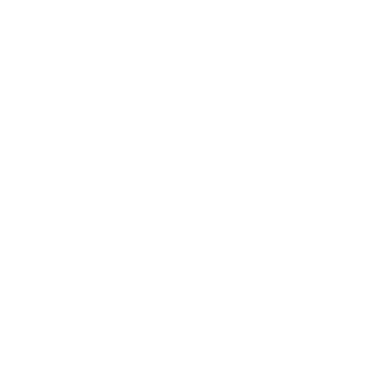

In [15]:
frames = [] # for storing the generated images
fig = plt.figure()
plt.axis('off')
for img in image_np:
    
    frames.append([plt.imshow(img, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=100, #blit=True,
                                repeat_delay=50)
# plt.axis
ani.save('./samples/3d_image_organmnist3d_original.gif', writer='imagemagick', fps=5)
# plt.show()

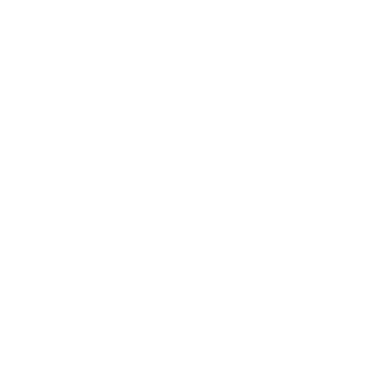

In [16]:
frames = [] # for storing the generated images
fig = plt.figure()
plt.axis('off')

for img in image_resized_np:
    
    frames.append([plt.imshow(img, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=100, #blit=True,
                                repeat_delay=50)
ani.save('./samples/3d_image_organmnist3d_resized.gif', writer='imagemagick', fps=5)
# plt.show() 